# Correlation
Because the results of the classifiers are not goed, let's see in this chapter whether there is actually a correlation between the features and the winners.

In [2]:
from util import get_wpm_train_test

train_x, train_y, test_x, test_y = get_wpm_train_test()

## Correlation between the features
Code is often based on [this article](https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv/notebook). Pearson correlation gives a number between -1 and 1 and checks for a linear correlation, where -1 is a strongly negative correlation and 1 is a positive correlation. ([src](https://www.sciencedirect.com/topics/computer-science/pearson-correlation))

In [7]:
cor = train_x.corr(method='pearson')
cor

,Actief,Lang,Vragen,Interpunctie,Tweeledigheid,Emotie,Voorwaartse Verwijzing,Signaalwoorden,Lidwoorden,Adjectieven,Eigennamen,Betrekking,Voor+Achternaam,Cijfers,Quotes
Actief,1.000000,0.026710,-0.008177,0.038389,0.050975,0.049637,0.042012,-0.049326,-0.011262,-0.030631,0.051119,-0.052484,0.027314,0.009460,0.086721
Lang,0.026710,1.000000,0.036995,0.027691,0.374901,0.127164,-0.055178,-0.009987,0.094361,0.004542,0.113110,-0.060542,-0.036268,0.066931,0.288991
Vragen,-0.008177,0.036995,1.000000,-0.002926,0.015230,-0.059049,0.068234,0.059990,0.150727,-0.057464,-0.037667,0.234814,-0.048280,-0.049653,-0.088982
Interpunctie,0.038389,0.027691,-0.002926,1.000000,-0.011687,-0.024007,0.011096,-0.026779,-0.028972,0.063579,-0.025060,-0.000273,0.030303,-0.042526,-0.004103
Tweeledigheid,0.050975,0.374901,0.015230,-0.011687,1.000000,0.145358,-0.165778,-0.030284,-0.001157,-0.048214,0.094806,-0.019042,-0.031098,0.044720,0.557158
Emotie,0.049637,0.127164,-0.059049,-0.024007,0.145358,1.000000,-0.085787,-0.028252,-0.040631,0.021752,0.188343,-0.072186,-0.027114,0.086834,0.180065
Voorwaartse Verwijzing,0.042012,-0.055178,0.068234,0.011096,-0.165778,-0.085787,1.000000,0.034410,0.143128,0.024561,-0.087128,0.163446,-0.029500,-0.053232,-0.168251
Signaalwoorden,-0.049326,-0.009987,0.059990,-0.026779,-0.030284,-0.028252,0.034410,1.000000,0.031880,-0.032046,-0.043063,0.094983,-0.015879,-0.002027,-0.006508
Lidwoorden,-0.011262,0.094361,0.150727,-0.028972,-0.001157,-0.040631,0.143128,0.031880,1.000000,-0.021504,0.011398,0.079258,-0.034254,-0.056608,-0.141177
Adjectieven,-0.030631,0.004542,-0.057464,0.063579,-0.048214,0.021752,0.024561,-0.032046,-0.021504,1.000000,-0.053560,-0.043194,-0.038112,0.012273,-0.112060


C:\Users\arnod\AppData\Local\Temp/ipykernel_11812/4089529563.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


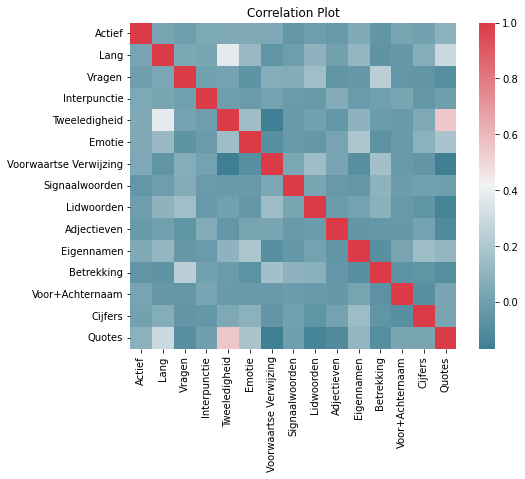

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

The strongest correlation is between "tweeledigheid" and "quotes" (which makes sense). However it's still strange that this value is below 0.7, since that's a value from which a correlations get's seen as significant accoording to [this article](https://www.sciencedirect.com/topics/computer-science/pearson-correlation#:~:text=This%20is%20interpreted%20as%20follows,relationship%20exists%20between%20the%20two.).

## Correlation between winner and labels
Let's use a chi-square test for independences. It tests to see whether distributions of categorical variabls differ from each another. ([src](https://www.statisticshowto.com/probability-and-statistics/chi-square/#chisquareqtest)) This code is also based on [the same kaggle article as the code above](https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv/notebook).

In [26]:
from util import get_label_columns
from scipy.stats import chi2_contingency
import pandas as pd

label_p_list = []
for label in get_label_columns():
    csq = chi2_contingency(pd.crosstab(train_y['Winner'], train_x[label]))
    label_p_list.append((label, csq[1]))

label_p_list_sorted = sorted(label_p_list, key=lambda x: x[1], reverse=False)

In [30]:
for label, p in label_p_list_sorted:
    print(f"The p-value for {label} is {p}")

The p-value for Voorwaartse Verwijzing is 1.594695887037246e-15
The p-value for Actief is 3.582906458461452e-10
The p-value for Emotie is 4.099015079317896e-05
The p-value for Adjectieven is 7.153467521574689e-05
The p-value for Lang is 0.08848611308620712
The p-value for Betrekking is 0.14214388250342994
The p-value for Quotes is 0.15525349217608528
The p-value for Eigennamen is 0.3127924301113145
The p-value for Tweeledigheid is 0.3278369872157919
The p-value for Lidwoorden is 0.41283301762564784
The p-value for Interpunctie is 0.6002709602457574
The p-value for Cijfers is 0.6226456364002639
The p-value for Voor+Achternaam is 0.9135767495396614
The p-value for Vragen is 0.9729067135355265
The p-value for Signaalwoorden is 1.0


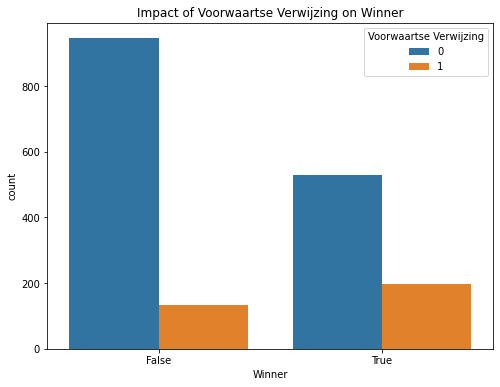

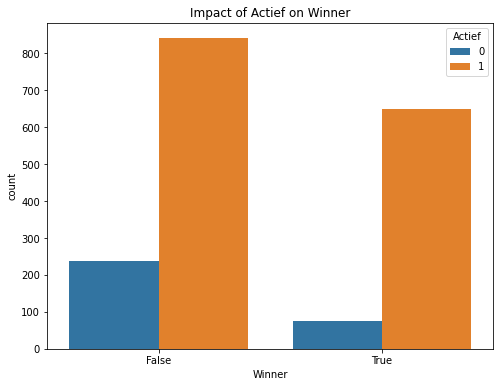

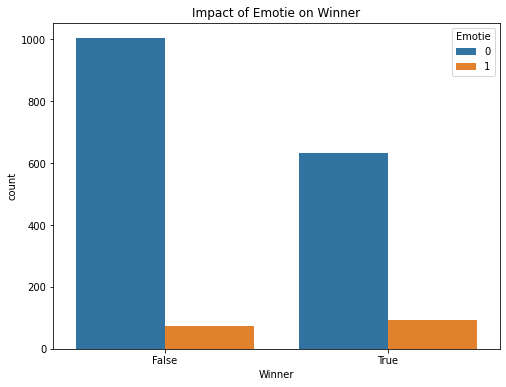

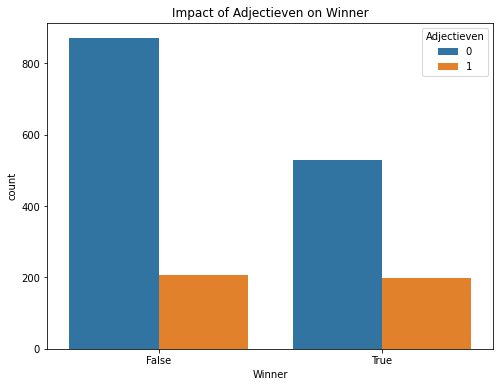

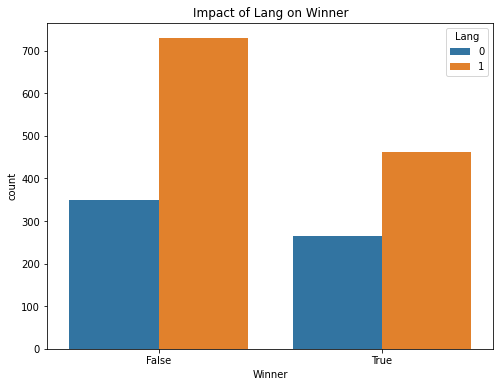

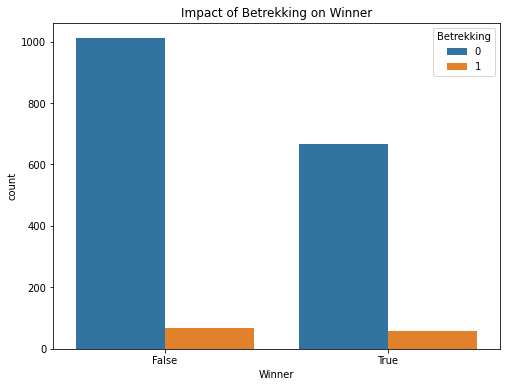

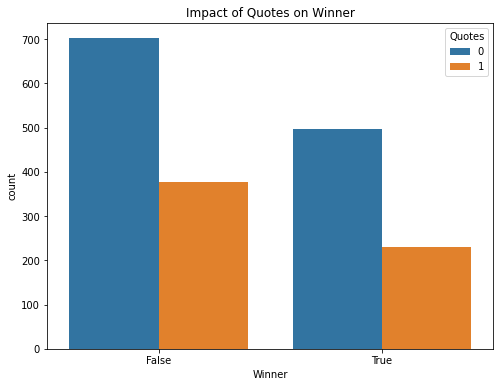

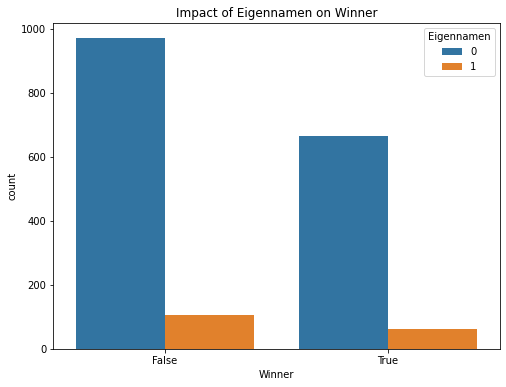

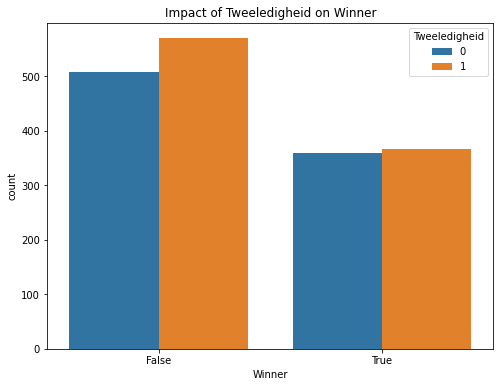

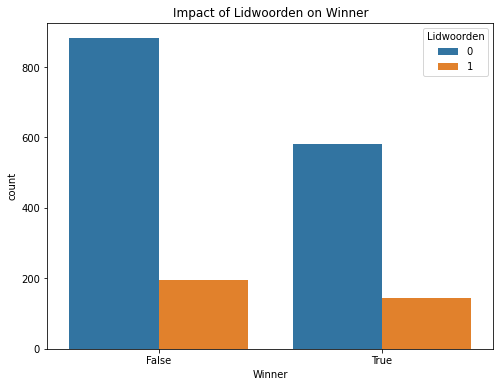

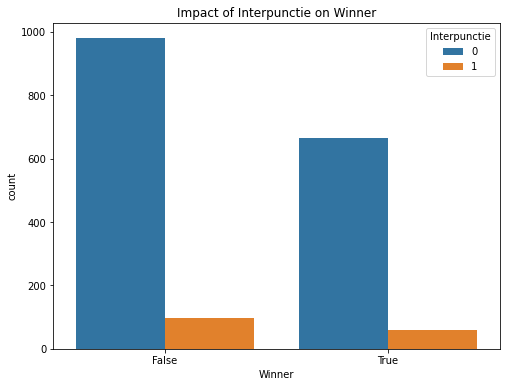

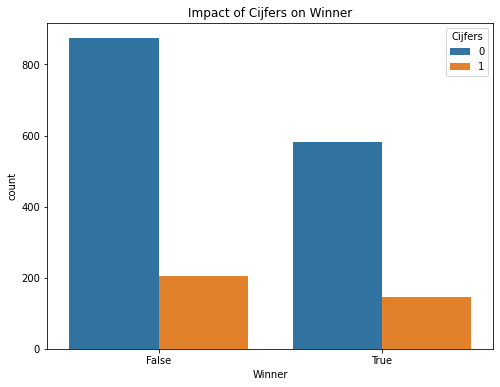

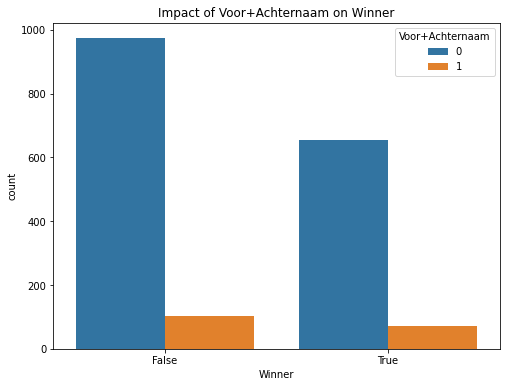

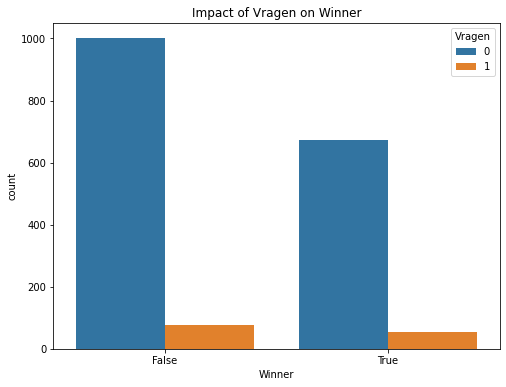

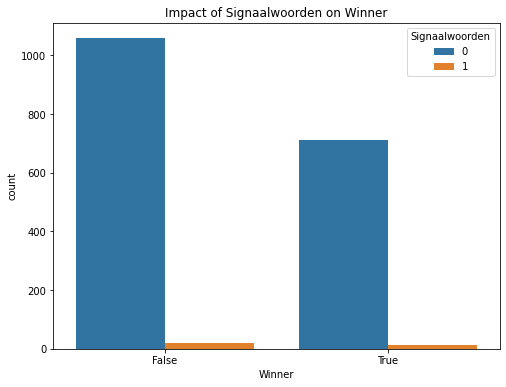

In [29]:
for label, p in label_p_list_sorted:
    fig, ax=plt.subplots(figsize=(8,6))
    sns.countplot(x="Winner", data=pd.merge(train_x, train_y), hue=label)
    plt.title(f"Impact of {label} on Winner")
    plt.show()

As seen in our Naïve Bayes model, Voorwaartse verwijzing has a high correlation with the winner label, while signaalwoorden don't (with 0.05 as alpha, Voorwartse verwijzing, actief, emotie and adjectieven are the most interesting features).